# 基于MindSpore构造多层网络模型

本小节主要介绍多层神经网络模型的设计，使用线性回归实例作为讲解实例。


## 1、实验目的

- 了解多层神经网络模型的原理。
- 掌握如何使用MIndspore构建线性函数来实现多层神经网络模型的设计。


## 2、多层网络模型原理介绍
多层网络模型指含有多个中间层的神经网络。在本实验中定义了一个内部有两层全连接层的网络，该网络有五个输入和一个输出，用于介绍多层神经网络模型。  
下图是该网络的示意图，从图中可以看出，该网络共有五个部分，分别是五个输入、(5,32)的层1、激活函数ReLU、(32,1)的层2和一个输出，经过这个多层神经网络模型后，五个输入转化为一个输出。  
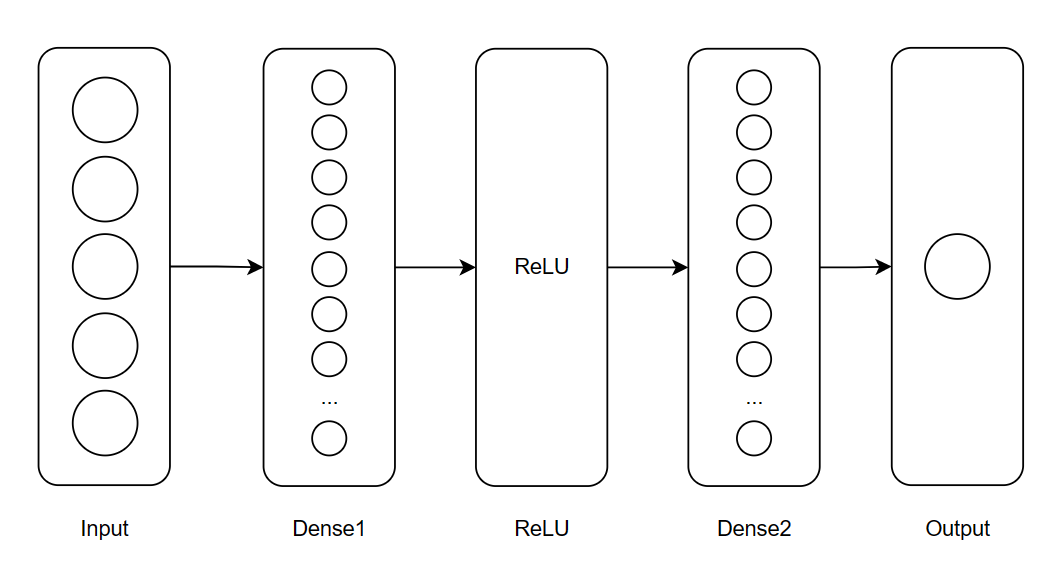

## 3、实验环境
在动手进行实践之前，需要注意以下几点：
* 确保实验环境正确安装，包括安装MindSpore。安装过程：首先登录[MindSpore官网安装页面](https://www.mindspore.cn/install)，根据安装指南下载安装包及查询相关文档。同时，官网环境安装也可以按下表说明找到对应环境搭建文档链接，根据环境搭建手册配置对应的实验环境。
* 推荐使用交互式的计算环境Jupyter Notebook，其交互性强，易于可视化，适合频繁修改的数据分析实验环境。
* 实验也可以在华为云一站式的AI开发平台ModelArts上完成。
* 推荐实验环境：MindSpore版本=MindSpore 2.0；Python环境=3.7


|  硬件平台 |  操作系统  | 软件环境 | 开发环境 | 环境搭建链接 |
| :-----:| :----: | :----: |:----:   |:----:   |
| CPU | Windows-x64 | MindSpore2.0 Python3.7.5 | JupyterNotebook |[MindSpore环境搭建实验手册第二章2.1节和第三章3.1节](./MindSpore环境搭建实验手册.docx)|
| GPU CUDA 10.1|Linux-x86_64| MindSpore2.0 Python3.7.5 | JupyterNotebook |[MindSpore环境搭建实验手册第二章2.2节和第三章3.1节](./MindSpore环境搭建实验手册.docx)|
| Ascend 910  | Linux-x86_64| MindSpore2.0 Python3.7.5 | JupyterNotebook |[MindSpore环境搭建实验手册第四章](./MindSpore环境搭建实验手册.docx)|

## 4、数据处理

产生输入数据。  
使用np.random.seed()将随机种子设为4，使每次随机的数据相同。使用np.random.randn()随机生成数据和标签。  
数据如下所示：  
data：  
[[ 0.05056171  0.49995133 -0.9959089   0.6935985  -0.41830152]  
 [-1.5845772  -0.64770675  0.5985752   0.33225003 -1.1474767 ]  
 [ 0.6186697  -0.08798693  0.4250724   0.33225316 -1.1568162 ]  
 [ 0.35099715 -0.6068873   1.5469793   0.7233416   0.04613557]  
 [-0.98299164  0.05443274  0.15989293 -1.2089481   2.2233603 ]]  
lable：  
[[ 0]  
 [ 1]  
 [-1]  
 [ 1]  
 [-1]]  
 Numpy模块主要用于数据的基本运算操作。MindSpore相关模块主要用于搭建网络、调用优化器、读取数据集和将数据集处理成网络的标准输入格式。

In [1]:
import numpy as np

import mindspore.nn as nn
import mindspore.ops as ops
import mindspore.dataset as ds
from mindspore import ParameterTuple
from mindspore.train import Model, Callback


# 随机种子设为4，使每次得到的数据相同
np.random.seed(4)

# 产生数据和标签
class DatasetGenerator:
    def __init__(self):
        self.data = np.random.randn(5, 5).astype(np.float32)
        self.label = np.random.randn(5, 1).astype(np.int32)

    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return len(self.data)

# 对输入数据进行处理
dataset_generator = DatasetGenerator()
dataset = ds.GeneratorDataset(dataset_generator, ["data", "label"], shuffle=True)
dataset = dataset.batch(32)

## 5、模型构建
定义多层神经网络，内部有两层全连接层组成的网络，包含五个入参和一个出参。

In [2]:
# 定义多层神经网络
class LinearNet(nn.Cell):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()
        self.dense1 = nn.Dense(5, 32)
        self.dense2 = nn.Dense(32, 1)

    def construct(self, x):
        x = self.dense1(x)
        x = self.relu(x)
        x = self.dense2(x)
        return x

## 6、网络训练
设定损失函数、优化器并开始训练网络。

In [3]:
# 定义LossMonitor回调函数
class LossMonitor(Callback):
    def __init__(self):
        super(LossMonitor, self).__init__()

    def step_end(self, run_context):
        cb_params = run_context.original_args()
        print("Step: {}, Loss: {}".format(cb_params.cur_step_num, cb_params.net_outputs.asnumpy()))

# 定义模型和损失函数
net = LinearNet()
loss = nn.MSELoss()

# 定义优化器
optim = nn.Adam(net.trainable_params())

model = Model(net, loss_fn=loss, optimizer=optim, metrics=None)
model.train(300, dataset, callbacks=[LossMonitor()])

Step: 1, Loss: 0.8008807301521301
Step: 2, Loss: 0.8000580072402954
Step: 3, Loss: 0.7992907166481018
Step: 4, Loss: 0.7985705137252808
Step: 5, Loss: 0.7978178262710571
Step: 6, Loss: 0.797031819820404
Step: 7, Loss: 0.79618901014328
Step: 8, Loss: 0.7952867746353149
Step: 9, Loss: 0.7943032383918762
Step: 10, Loss: 0.793244481086731
Step: 11, Loss: 0.7920647263526917
Step: 12, Loss: 0.790791392326355
Step: 13, Loss: 0.7894314527511597
Step: 14, Loss: 0.7879596948623657
Step: 15, Loss: 0.7863955497741699
Step: 16, Loss: 0.7846953868865967
Step: 17, Loss: 0.7828614711761475
Step: 18, Loss: 0.7808889150619507
Step: 19, Loss: 0.7787945866584778
Step: 20, Loss: 0.7765535712242126
Step: 21, Loss: 0.7742043137550354
Step: 22, Loss: 0.7716949582099915
Step: 23, Loss: 0.7690463066101074
Step: 24, Loss: 0.7662519216537476
Step: 25, Loss: 0.7632836103439331
Step: 26, Loss: 0.7601554989814758
Step: 27, Loss: 0.7569040060043335
Step: 28, Loss: 0.7535094022750854
Step: 29, Loss: 0.7499356865882874

Step: 257, Loss: 9.973166470444994e-07
Step: 258, Loss: 8.031941547415045e-07
Step: 259, Loss: 6.444420819207153e-07
Step: 260, Loss: 5.120999730934273e-07
Step: 261, Loss: 4.0286477087647654e-07
Step: 262, Loss: 3.1312131909544405e-07
Step: 263, Loss: 2.3987905706235324e-07
Step: 264, Loss: 1.8105293975168024e-07
Step: 265, Loss: 1.3410542010205972e-07
Step: 266, Loss: 9.709664539059304e-08
Step: 267, Loss: 6.854176604065287e-08
Step: 268, Loss: 4.6990031421501044e-08
Step: 269, Loss: 3.10910515111118e-08
Step: 270, Loss: 1.9911851723009022e-08
Step: 271, Loss: 1.2517904046660533e-08
Step: 272, Loss: 8.14903433621339e-09
Step: 273, Loss: 6.157503840142908e-09
Step: 274, Loss: 5.995507201816963e-09
Step: 275, Loss: 7.173105220914522e-09
Step: 276, Loss: 9.258235955655891e-09
Step: 277, Loss: 1.1954446321738033e-08
Step: 278, Loss: 1.501070912013347e-08
Step: 279, Loss: 1.8178434757487594e-08
Step: 280, Loss: 2.1300259334111615e-08
Step: 281, Loss: 2.425295875241318e-08
Step: 282, Loss:

## 7、模型预测
生成测试数据，调用model.predict()对测试数据进行测试，输出预测结果。

In [4]:
from mindspore import Tensor

# 生成测试数据
np.random.seed(1)
test_data = np.random.randn(1, 5).astype(np.float32)
print('data:' + '%s'%test_data)
# 模型测试
test_result = model.predict(Tensor(test_data))
print('predict result:' + '%s'%test_result)

data:[[ 1.6243454  -0.6117564  -0.5281718  -1.0729686   0.86540765]]
predict result:[[-1.0119656]]
